In [8]:
# importing the required libraries
# Note: the dataset folder 'genre_original' has be uploaded to the location: drive/genres_original

'''
Authors: Keertikumar Kubareea & Aryan Laxman Sirohi
'''
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import wavfile
from scipy.signal import spectrogram

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The code below contains a python function to extract the features using the scipy library from 'genres_original' and counting the number of genre in each feature folder

In [9]:
def extract_features(file_path):
    try:
        rate, audio = wavfile.read(file_path)

        # Calculating spectrogram: Help for the code found on a youtube guide at
        # https://www.youtube.com/watch?v=PYlr8ayHb4g (However, we used scipy for audio processing instead of the librosa library)
        _, _, Sxx = spectrogram(audio, fs=rate)
        mean_spectrogram = np.mean(Sxx, axis=1)
        std_spectrogram = np.std(Sxx, axis=1)

        return mean_spectrogram, std_spectrogram

    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None


Once the function has been created, we will open the genres folder, navigate through each genre and create our dataset.

In [18]:
data_folder = "/content/drive/MyDrive/genres_original"

data = []

# Here, we will iterate through each genre folder (rock, reggae, blues, etc ...)
for genre in os.listdir(data_folder):
    genre_folder = os.path.join(data_folder, genre)
    if os.path.isdir(genre_folder):

        num_samples = len(os.listdir(genre_folder))
        print(f"{genre}: {num_samples} samples")

        # The feature extraction function is applied here
        for file in os.listdir(genre_folder):
            file_path = os.path.join(genre_folder, file)
            features = extract_features(file_path)
            if features:
                data.append((*features, genre))

# Finally, creating the dataframe
df = pd.DataFrame(data, columns=['mean_spectrogram', 'std_spectrogram', 'genre'])


jazz: 100 samples
Error extracting features from /content/drive/MyDrive/genres_original/jazz/jazz.00054.wav: File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported.
country: 100 samples
hiphop: 100 samples
rock: 100 samples
classical: 100 samples
reggae: 100 samples
blues: 100 samples
disco: 100 samples
metal: 100 samples
pop: 100 samples


Once the dataset created, we will now create the plot of the distribution of samples across all the genres using matplot for a visual representation of the data.

<ipython-input-14-12ddaf8053fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df, palette='Set2')


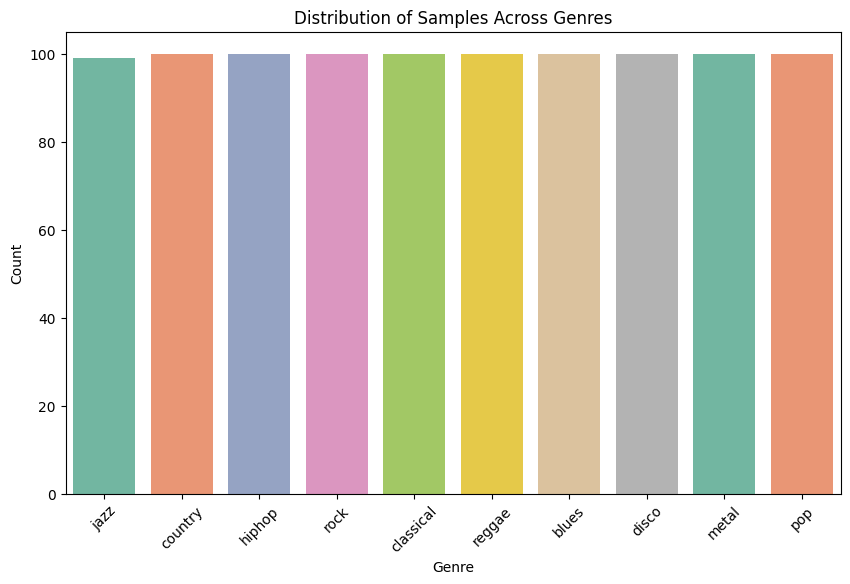

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df, palette='Set2')
plt.title('Distribution of Samples Across Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Finally, to conclude part one of the project, we will assess the dataset's balanceness and display the number of samples in each class

In [17]:
balanced = df['genre'].value_counts().max() - df['genre'].value_counts().min() <= 3
print(f"Is the dataset balanced? {'Yes, within a range of +- 3 samples' if balanced else 'No'}")

num_samples = len(df)
num_classes = len(df['genre'].unique())
print(f"Number of samples: {num_samples}")
print(f"Number of classes: {num_classes}")

Is the dataset balanced? Yes, within a range of +- 3 samples
Number of samples: 999
Number of classes: 10
